In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [119]:
data= pd.read_csv("C:\\Users\\Ananya Nayak\\Downloads\\Fraud.csv")

In [120]:
data.shape

(6362620, 11)

In [121]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [122]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [124]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* There is no missing values

In [125]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [126]:
type=data['type'].value_counts()

In [127]:
transaction=type.index

In [128]:
quantity=type.values

In [129]:
import plotly.express as px

In [130]:
px.pie(data,values=quantity,names=transaction,hole=0.4,title="Distribution of transaction type")

In [131]:
data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [132]:
df = data.drop(['nameOrig', 'nameDest'], axis=1)

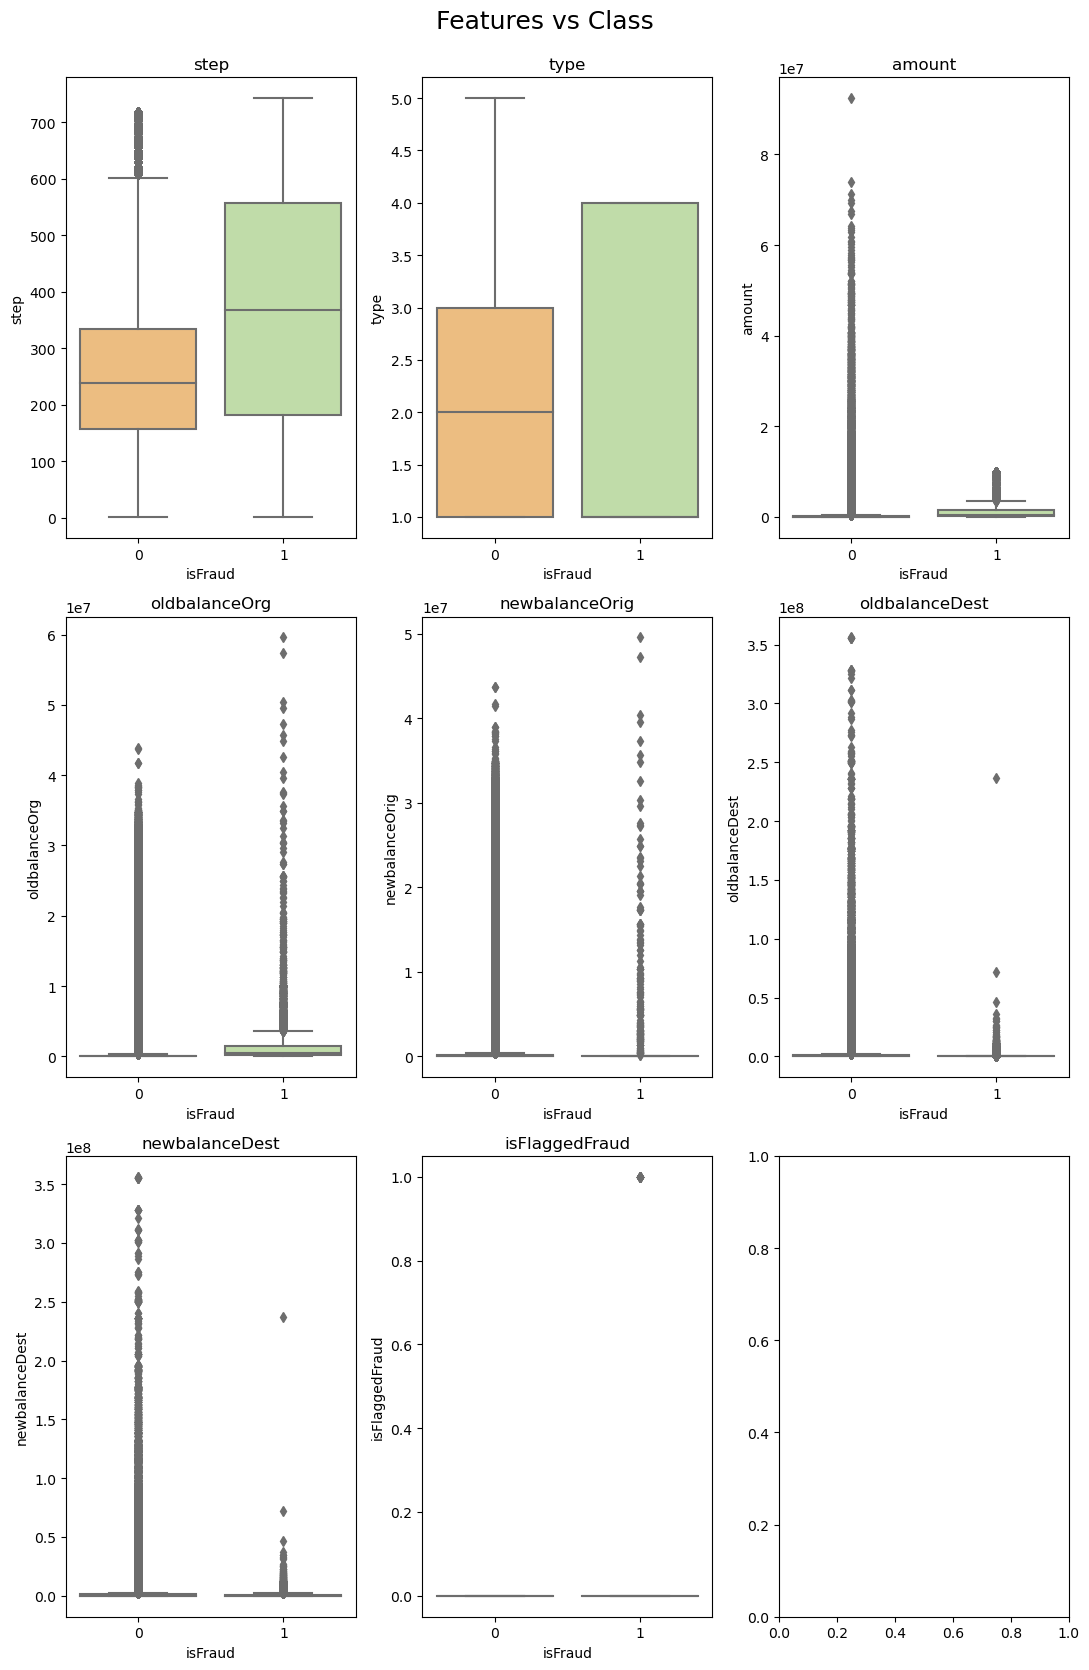

In [133]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='isFraud', y='step', palette='Spectral')
axes[0,0].set_title("step");

sns.boxplot(ax=axes[0, 1], data=df, x='isFraud', y='type', palette='Spectral')
axes[0,1].set_title("type");

sns.boxplot(ax=axes[0, 2], data=df, x='isFraud', y='amount', palette='Spectral')
axes[0,2].set_title("amount");

sns.boxplot(ax=axes[1, 0], data=df, x='isFraud', y='oldbalanceOrg', palette='Spectral')
axes[1,0].set_title("oldbalanceOrg");

sns.boxplot(ax=axes[1, 1], data=df, x='isFraud', y='newbalanceOrig', palette='Spectral')
axes[1,1].set_title("newbalanceOrig");

sns.boxplot(ax=axes[1, 2], data=df, x='isFraud', y='oldbalanceDest', palette='Spectral')
axes[1,2].set_title("oldbalanceDest");

sns.boxplot(ax=axes[2, 0], data=df, x='isFraud', y='newbalanceDest', palette='Spectral')
axes[2,0].set_title("newbalanceDest");
sns.boxplot(ax=axes[2, 1], data=df, x='isFraud', y='isFlaggedFraud', palette='Spectral')
axes[2,1].set_title("isFlaggedFraud");

plt.tight_layout()

       

In [134]:
def z_score_method (df,n,features):
    
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)     
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers


In [135]:
feature_list=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# detecting outliers
Outliers_z_score = z_score_method(df,1,feature_list)

# dropping outliers
data = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 75166


In [136]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [137]:
legit= data[data['isFraud'] == 0]
fraud = data[data['isFraud'] == 1]

In [138]:
legit.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.129037e+06,6.129037e+06,6.129037e+06,6.129037e+06,6.129037e+06,6.129037e+06,6.129037e+06,6129037.0,6129037.0
mean,2.430712e+02,2.025715e+00,1.594482e+05,4.580358e+05,4.777755e+05,8.490314e+05,9.539727e+05,0.0,0.0
std,1.423626e+02,9.739493e-01,3.132058e+05,1.438913e+06,1.480425e+06,1.708053e+06,1.805440e+06,0.0,0.0
min,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.550000e+02,1.000000e+00,1.280462e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.380000e+02,2.000000e+00,7.063025e+04,1.200600e+04,0.000000e+00,1.018836e+05,1.925233e+05,0.0,0.0
75%,3.340000e+02,3.000000e+00,2.052813e+05,9.863800e+04,1.158505e+05,8.609651e+05,1.034867e+06,0.0,0.0
max,7.180000e+02,5.000000e+00,1.000000e+07,9.625924e+06,1.026636e+07,1.306083e+07,4.266109e+07,0.0,0.0


In [139]:
legit.amount.describe()

count    6.129037e+06
mean     1.594482e+05
std      3.132058e+05
min      1.000000e-02
25%      1.280462e+04
50%      7.063025e+04
75%      2.052813e+05
max      1.000000e+07
Name: amount, dtype: float64

In [140]:
fraud.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7.845000e+03,7.845000e+03,7.845000e+03,7845.0,7845.000000
mean,365.216826,2.505927,1.123149e+06,1.121965e+06,3.980485e+03,4.022708e+05,9.576191e+05,1.0,0.001275
std,216.454979,1.500084,1.729532e+06,1.730024e+06,1.258346e+05,1.240999e+06,1.920119e+06,0.0,0.035682
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,177.000000,1.000000,1.200747e+05,1.176834e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,363.000000,4.000000,3.987117e+05,3.980420e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
75%,557.000000,4.000000,1.299861e+06,1.298921e+06,0.000000e+00,1.361420e+05,9.687189e+05,1.0,0.000000
max,743.000000,4.000000,9.468064e+06,9.468064e+06,5.674548e+06,1.179191e+07,1.264629e+07,1.0,1.000000


In [141]:
fraud.amount.describe()

count    7.845000e+03
mean     1.123149e+06
std      1.729532e+06
min      0.000000e+00
25%      1.200747e+05
50%      3.987117e+05
75%      1.299861e+06
max      9.468064e+06
Name: amount, dtype: float64

In [142]:
# compare the values for both transactions
data.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,243.071156,2.025715,1.594482e+05,4.580358e+05,477775.515808,849031.374602,953972.726788,0.000000
1,365.216826,2.505927,1.123149e+06,1.121965e+06,3980.485465,402270.784407,957619.131992,0.001275


In [143]:
# Increase the sample size of legitimate transactions
desired_sample_size = 10000  # Set desired_sample_size to the desired number of samples
legit_sample = legit.sample(n=desired_sample_size)  # Increase the sample size

# Concatenate under-sampled legitimate transactions with fraudulent transactions
new_df = pd.concat([legit_sample, fraud], axis=0)

new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2404751,204,1,105105.11,0.00,0.00,1501408.49,1606513.61,0,0
2243796,188,1,236376.07,0.00,0.00,3754434.33,3990810.40,0,0
3773948,284,1,98443.00,1346.00,0.00,96834.00,195277.01,0,0
236508,14,3,10635.33,2904770.08,2915405.41,2744338.20,3988678.56,0,0
3207363,252,1,137575.28,0.00,0.00,675840.11,338219.65,0,0


In [144]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='isFraud', axis=1)
y = new_df['isFraud']

In [145]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
print(X.shape, X_train.shape, X_test.shape)

(17845, 8) (14276, 8) (3569, 8)


In [148]:
df_train = new_df.copy()
df_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2404751,204,1,105105.11,0.00,0.00,1501408.49,1606513.61,0,0
2243796,188,1,236376.07,0.00,0.00,3754434.33,3990810.40,0,0
3773948,284,1,98443.00,1346.00,0.00,96834.00,195277.01,0,0
236508,14,3,10635.33,2904770.08,2915405.41,2744338.20,3988678.56,0,0
3207363,252,1,137575.28,0.00,0.00,675840.11,338219.65,0,0


In [149]:
def display_feature_importance(model,percentage ,top_n=34, plot=False):
    # X and y 
    X = df_train.drop('isFraud',axis=1)
    y = df_train['isFraud']
    
    model.fit(X, y)
    
    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # A threshold is calculated based on a specified percentage of the top feature importance.
    #  Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']
    
    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
    
    #Print Selected Feature 
    print("Selected Features by {} \n \n at threshold {}%; {}".format(model , percentage,selected_features))
    if plot==True:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")
    
        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()
        
    # Add 'Exited' to the list of selected features
    selected_features.append('isFraud')
        
    return selected_features

In [150]:
from xgboost import XGBClassifier
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List 
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        # Get selected features for each model
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

        # Append selected features to the respective lists
        selected_features_xgb.append(xgb_selected_features)

        # X and y 
        X = df_train.drop('isFraud',axis=1)
        y = df_train['isFraud']
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'isFraud']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'isFraud']])[:, 1]

        # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC 
        sorted_auc = sorted(auc_scores, reverse=True)


Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['newbalanceOrig', 'oldbalanceOrg', 'type', 'isFlaggedFraud', 'amount']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_

In [151]:
# Print Each AUC with Percentage 
for score, percentage in sorted_auc:
    print(f'The AUC with {percentage}% of top features is {score:.4f}')

The AUC with 3% of top features is 0.9994
The AUC with 5% of top features is 0.9831
The AUC with 10% of top features is 0.9780
The AUC with 40% of top features is 0.7075
The AUC with 20% of top features is 0.7075


In [152]:
# Impottant Feature Extract Using XGb 
imp_fea=['newbalanceOrig', 'oldbalanceOrg', 'type', 'isFlaggedFraud', 'amount', 'isFraud']
df_train = df_train[imp_fea]
df_train.head()

,newbalanceOrig,oldbalanceOrg,type,isFlaggedFraud,amount,isFraud
2404751,0.00,0.00,1,0,105105.11,0
2243796,0.00,0.00,1,0,236376.07,0
3773948,0.00,1346.00,1,0,98443.00,0
236508,2915405.41,2904770.08,3,0,10635.33,0
3207363,0.00,0.00,1,0,137575.28,0


In [153]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    
    # # Scaling Data 
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')
    
    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb) 
    plt.figure(figsize =(8, 6)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap="Blues"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Accuracy on Test Set: 0.99
Precision on Test Set: 0.99
Recall on Test Set: 1.00


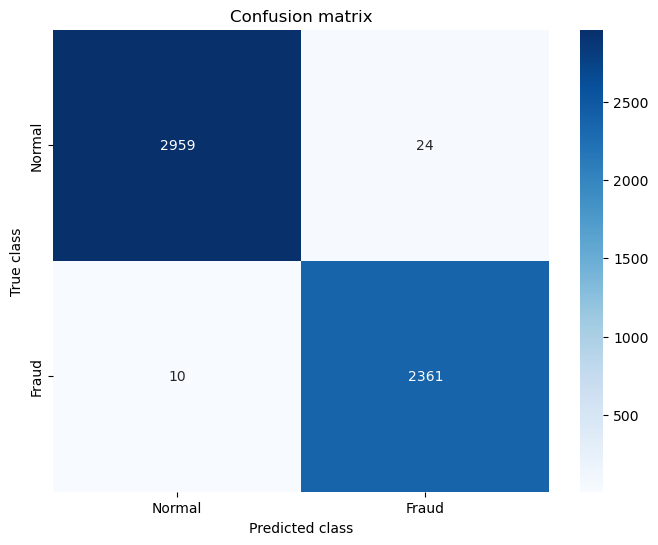

[0]	validation_0-error:0.02746	validation_0-logloss:0.51747	validation_1-error:0.03063	validation_1-logloss:0.51678
[1]	validation_0-error:0.01481	validation_0-logloss:0.40425	validation_1-error:0.01700	validation_1-logloss:0.40460
[2]	validation_0-error:0.01545	validation_0-logloss:0.32362	validation_1-error:0.01588	validation_1-logloss:0.32434
[3]	validation_0-error:0.01473	validation_0-logloss:0.26291	validation_1-error:0.01569	validation_1-logloss:0.26423
[4]	validation_0-error:0.01177	validation_0-logloss:0.21412	validation_1-error:0.01326	validation_1-logloss:0.21638
[5]	validation_0-error:0.01121	validation_0-logloss:0.17710	validation_1-error:0.01307	validation_1-logloss:0.17966
[6]	validation_0-error:0.01081	validation_0-logloss:0.14804	validation_1-error:0.01307	validation_1-logloss:0.15112
[7]	validation_0-error:0.01009	validation_0-logloss:0.12489	validation_1-error:0.01270	validation_1-logloss:0.12833
[8]	validation_0-error:0.00969	validation_0-logloss:0.10625	validation_1

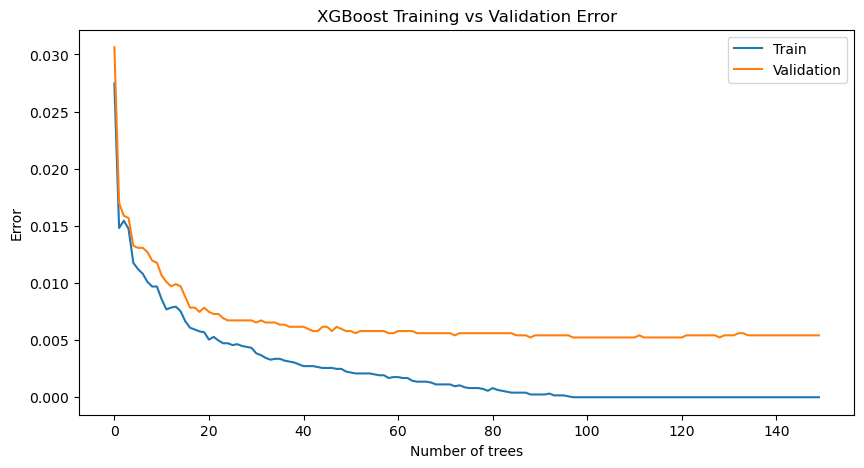

In [154]:
# Train XGBoost model
best_xgb_model, best_xgb_params = train_xgb_classifier(df_train, 'isFraud')

# Plotting Training vs Validation Error for XGBoost
def plot_training_vs_validation_error(model, X_train, y_train, X_val, y_val):
    eval_set = [(X_train, y_train), (X_val, y_val)]
    model.fit(X_train, y_train, eval_set=eval_set, eval_metric=["error", "logloss"], verbose=True)
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)

    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, results['validation_0']['error'], label='Train')
    plt.plot(x_axis, results['validation_1']['error'], label='Validation')
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of trees')
    plt.title('XGBoost Training vs Validation Error')
    plt.show()

# Plotting Training vs Validation Error for XGBoost model
plot_training_vs_validation_error(best_xgb_model, X_train, y_train, X_test, y_test)